In [4]:
import numpy as np
h_wall = {   1:[-6,6,6],
                          1.5:[-6,-3,3],
                          2:[-6,6,-6],
                          2.5:[-2,1,3],
                          3.5:[2,5,3],
                          5.5:[-6,-1,-1],
                          6.5:[0,5,-1]}
v_wall = np.array([[-6,6,-6],[3,6,-2],[-6,-1,0],[3,6,2],[-6,6,6]])
room_wall={  1: [v_wall[0]]+[v_wall[1]]+[h_wall[1]]+[h_wall[1.5]],
                          2: [v_wall[1]]+[v_wall[3]]+[h_wall[1]]+[h_wall[2.5]],
                          3: [v_wall[3]] + [v_wall[4]] + [h_wall[1]] + [h_wall[3.5]],
                          5: [v_wall[0]] + [v_wall[2]] + [h_wall[2]] + [h_wall[5.5]],
                          6: [v_wall[2]] + [v_wall[4]] + [h_wall[2]] + [h_wall[6.5]],
        }
wall_in_room = room_wall[1]
wall = {'v1':[(wall_in_room[0][2],wall_in_room[0][0]),(wall_in_room[0][2],wall_in_room[0][1])],
                'v2':[(wall_in_room[1][2],wall_in_room[1][0]),(wall_in_room[1][2],wall_in_room[1][1])],
                'h' :[(wall_in_room[2][0],wall_in_room[2][2]),(wall_in_room[2][1],wall_in_room[2][2])],
                'dr':[(wall_in_room[3][0],wall_in_room[3][2]),(wall_in_room[3][1],wall_in_room[3][2])]
                }
print(wall['dr'][1])

(-3, 3)


In [2]:
import torch
lz = torch.load('actor_4000.pt')
for parameter in lz.parameters():
    print(parameter)

AttributeError: 'collections.OrderedDict' object has no attribute 'parameters'

In [5]:
# -*- coding: utf-8 -*-
import numpy as np
from crowd_sim.envs.utils.utils import point_to_segment_dist as DIS

class Distance_to_Wall():
    def __init__(self,px,py):
        self.h_wall = {   1:[-6,6,6],
                          1.5:[-6,-3,3],
                          2:[-6,6,-6],
                          2.5:[-2,1,3],
                          3.5:[2,5,3],
                          5.5:[-6,-1,-1],
                          6.5:[0,5,-1]}
        self.v_wall = np.array([[-6,6,-6],[3,6,-2],[-6,-1,0],[3,6,2],[-6,6,6]])
        self.room_wall={  1: [self.v_wall[0]]+[self.v_wall[1]]+[self.h_wall[1]]+[self.h_wall[1.5]],
                          2: [self.v_wall[1]]+[self.v_wall[3]]+[self.h_wall[1]]+[self.h_wall[2.5]],
                          3: [self.v_wall[3]] + [self.v_wall[4]] + [self.h_wall[1]] + [self.h_wall[3.5]],
                          5: [self.v_wall[0]] + [self.v_wall[2]] + [self.h_wall[2]] + [self.h_wall[5.5]],
                          6: [self.v_wall[2]] + [self.v_wall[4]] + [self.h_wall[2]] + [self.h_wall[6.5]],
        }
        self.px = px
        self.py = py
        self.in_room = self.Which_Room()
    def generate_wall_point(self,wall_in_room):
        wall = {'v1':[(wall_in_room[0][2],wall_in_room[0][0]),(wall_in_room[0][2],wall_in_room[0][1])],
                'v2':[(wall_in_room[1][2],wall_in_room[1][0]),(wall_in_room[1][2],wall_in_room[1][1])],
                'h' :[(wall_in_room[2][0],wall_in_room[2][2]),(wall_in_room[2][1],wall_in_room[2][2])],
                'dr':[(wall_in_room[3][0],wall_in_room[3][2]),(wall_in_room[3][1],wall_in_room[3][2])]
                }
        return wall


    def Which_Room(self):
        if self.px>-6 and self.px<6:
            if self.py>-6 and self.py<6:
                if self.py>-6 and self.py<-1:
                    if self.px>-6 and self.px<0:
                        return 5
                    elif self.px>0 and self.px<6:
                        return 6
                elif self.py>-1 and self.py<3:
                    return 4
                elif self.py>3 and self.py<6:
                    if self.px>-6 and self.px<-2:
                        return 1
                    elif self.px>-2 and self.px<2:
                        return 2
                    elif self.px>2 and self.px<6:
                        return 3
                elif self.py==-1:
                    if self.px>-2 and self.px<0:
                        return 5.5
                    elif self.px>4 and self.px<6:
                        return 6.5
                elif self.py==3:
                    if self.px>-4 and self.px<-2:
                        return 1.5
                    elif self.px>0 and self.px<2:
                        return 2.5
                    elif self.px>4 and self.px<6:
                        return 3.5
        return 0
    def min_distance(self):
        if int(self.in_room) == self.in_room and self.in_room != 0:
            if self.in_room == 4:
                min_dis = []
                for key,value in self.room_wall.items():
                    dis = DIS(value[3][0],value[3][2],value[3][1],value[3][2],self.px,self.py)
                    min_dis.append(dis)
                min_dis.append(np.abs(self.px-6))
                min_dis.append(np.abs(self.px+6))
                return min(min_dis)
            else:
                return min(np.abs(self.px-self.room_wall[self.in_room][0][2]),np.abs(self.px-self.room_wall[self.in_room][1][2]),np.abs(self.py - self.room_wall[self.in_room][2][2]),
                           DIS(self.room_wall[self.in_room][3][0],self.room_wall[self.in_room][3][2],self.room_wall[self.in_room][3][1],self.room_wall[self.in_room][3][2],self.px,self.py))
        elif int(self.in_room) != self.in_room:
            return min(np.abs(self.px-self.h_wall[self.in_room][0]),np.abs(self.px-self.h_wall[self.in_room][1]))
        else:
            return -1



In [10]:
from crowd_sim.envs.utils.wall_distance import Distance_to_Wall as Dis
from crowd_sim.envs.utils.wall import Wall_Collide
static_state = Dis(0,0)
room = static_state.Which_Room()
if int(room) == room and room != 0:
    if room == 4:
        for wall in static_state.room_wall:
            print(wall)
            door_wall = static_state.generate_wall_point(wall)['dr']
            if Wall_Collide(px,py,ex,ey,door_wall,human.radius):
                collision = True
        if Wall_Collide(px, py, ex, ey, [(-6,-6),(-6,6)], human.radius) or Wall_Collide(px, py, ex, ey, [(6,-6),(6,6)], human.radius):
            collision = True
        if collision != True and Dis.min_distance(px, py) < dmin:
            dmin = Dis.min_distance(px, py)
    else:
        wall = static_state.room_wall[room]
        wall_point = static_state.generate_wall_point(wall)
        for single_wall in wall_point.values():
            if Wall_Collide(px,py,ex,ey,single_wall,human.radius):
                collision = True
            elif Dis.min_distance(px, py) < dmin:
                dmin = Dis.min_distance(px, py)
elif int(room) != room:
    pass
else:
    collision = True
print(collision)

1


TypeError: 'int' object is not subscriptable

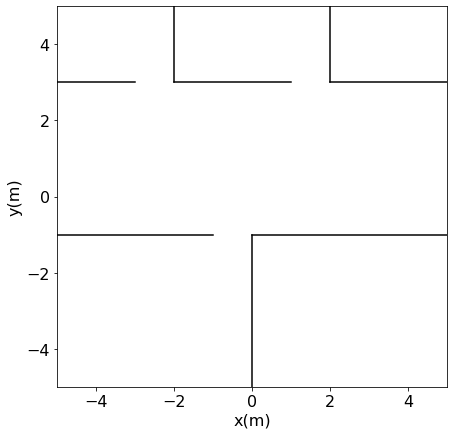

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 7))
ax.tick_params(labelsize=16)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('x(m)', fontsize=16)
ax.set_ylabel('y(m)', fontsize=16)
wall_class = Dis(0,0)
for wall_v in wall_class.v_wall:
    wall_v_line = plt.Line2D((wall_v[2], wall_v[2]),
                               (wall_v[0], wall_v[1]),
                               color='black', ls='solid')
    ax.add_artist(wall_v_line)
for wall_h in wall_class.h_wall.values():
    wall_h_line = plt.Line2D((wall_h[0], wall_h[1]),
                               (wall_h[2], wall_h[2]),
                               color='black', ls='solid')
    ax.add_artist(wall_h_line)
plt.show()